## 1. Introduction.
The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10
classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets
provides 10,000 images. This image taken from the CIFAR repository ( <a href = "https://www.cs.toronto.edu/~kriz/cifar.html">https://www.cs.toronto.edu/~kriz/cifar.html </a>). This is a classification problem with 10 classes(muti-label classification). We can take a view on this image for more comprehension of the dataset. 

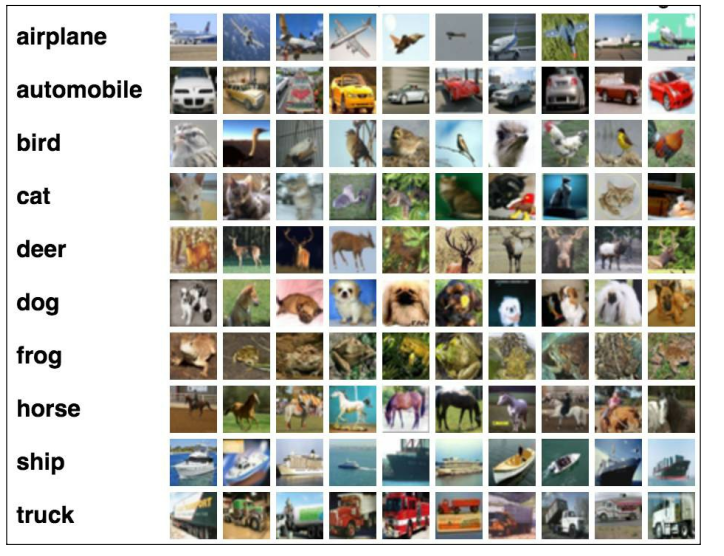


The challenge is to recognize previously unseen images and assign them to one of the 10 classes.

Ok Let's get started.

In [159]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
#from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline


In [160]:
batch_size = 32  # The default batch size of keras.
num_classes = 3  # Number of class for the dataset which are using

In [161]:
# download cifar10 dataset from keras
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


**Make a new dataset for automobile dog and horse**

In [162]:
index = np.where((y_train == 1) | (y_train == 5) | (y_train == 7))
x_train = x_train[index[0]]
y_train = y_train[index[0]]

In [163]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
#print(x_train.shape[0], 'train samples')

x_train shape: (15000, 32, 32, 3)
y_train shape: (15000, 1)


In [164]:
index = np.where((y_test == 1) | (y_test == 5) | (y_test == 7))
x_test = x_test[index[0]]
y_test = y_test[index[0]]

In [165]:
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_test shape: (3000, 32, 32, 3)
y_test shape: (3000, 1)


**Re-labeling data**

In [166]:
for n, i in enumerate(y_train):
    if i == 1:
        y_train[n] = 0
    elif i==5:
        y_train[n]= 1
    else:
        y_train[n]= 2

In [167]:
for n, i in enumerate(y_test):
    if i == 1:
        y_test[n] = 0
    elif i==5:
        y_test[n]= 1
    else:
        y_test[n]= 2

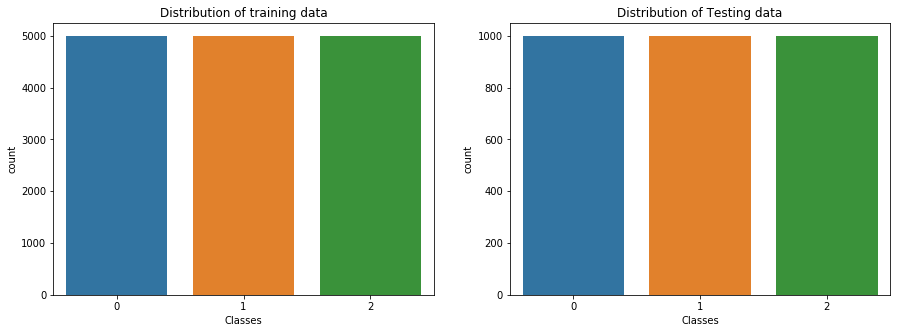

In [168]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [169]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [190]:
#define the convnet
model = Sequential()
# CONV2D => CONV2D => BATCHNORMALIZATION => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV2D => CONV2D => BATCHNORMALIZATION => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV2D => CONV2D => BATCHNORMALIZATION => POOL => DROPOUT
model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes,activation='softmax'))


model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_64 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_85 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 13, 13, 64)      

In [191]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [197]:
#history = model.fit(x_train, y_train,
 #             batch_size=batch_size,
  #            epochs=15,
   #           validation_data=(x_test, y_test),
    #          shuffle=True)

In [192]:
history = None  # For recording the history of trainning process.
data_augmentation = True

if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0.,
        fill_mode='nearest',
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        validation_split=0.0)

    datagen.fit(x_train)
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=40,
                                    validation_data=(x_test, y_test),
                                    workers=4)

Using real-time data augmentation.
Epoch 1/40
469/469 [==============================] - 15s 32ms/step - loss: 0.7171 - accuracy: 0.7071 - val_loss: 0.6835 - val_accuracy: 0.7237
Epoch 2/40
469/469 [==============================] - 13s 27ms/step - loss: 0.4761 - accuracy: 0.8038 - val_loss: 0.3294 - val_accuracy: 0.8650
Epoch 3/40
469/469 [==============================] - 13s 29ms/step - loss: 0.4116 - accuracy: 0.8357 - val_loss: 0.3540 - val_accuracy: 0.8627
Epoch 4/40
469/469 [==============================] - 13s 28ms/step - loss: 0.3787 - accuracy: 0.8467 - val_loss: 0.3049 - val_accuracy: 0.8733
Epoch 5/40
469/469 [==============================] - 14s 30ms/step - loss: 0.3528 - accuracy: 0.8619 - val_loss: 0.3329 - val_accuracy: 0.8660
Epoch 6/40
469/469 [==============================] - 13s 28ms/step - loss: 0.3279 - accuracy: 0.8713 - val_loss: 0.4587 - val_accuracy: 0.8420
Epoch 7/40
469/469 [==============================] - 13s 27ms/step - loss: 0.3169 - accuracy: 0.8756

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


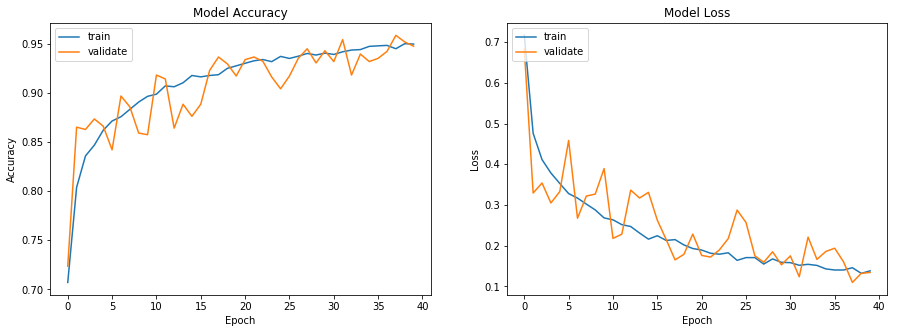

In [193]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)


In [194]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

3000/3000 [==============================] - 0s 126us/step
Test loss: 0.13407036433617273
Test accuracy: 0.9473333358764648


In [195]:
labels = ['Automobile', 'Dog', 'Horse']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)

In [196]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1000
           1       0.93      0.92      0.93      1000
           2       0.92      0.94      0.93      1000

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



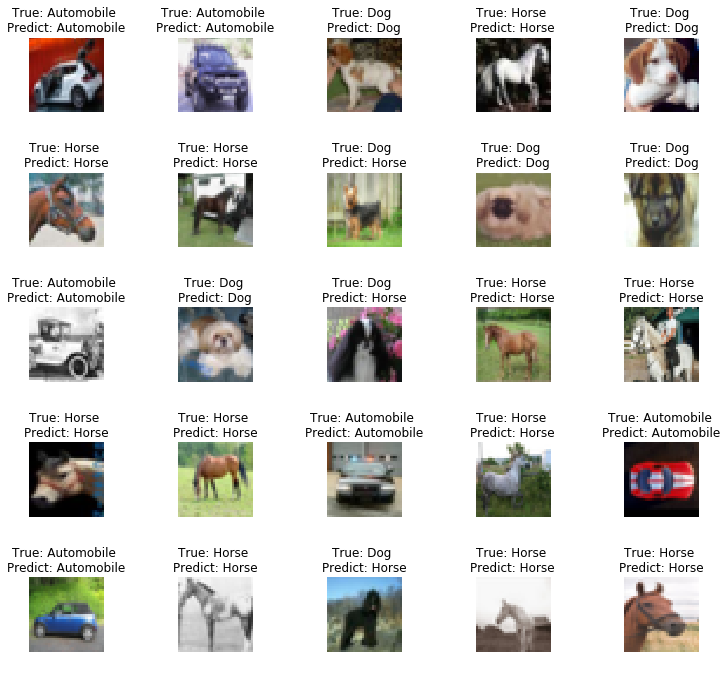

In [181]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)


In [182]:
def show_similar(number,dict_key):
    for i in range(300): #Only taking few samples from test dataset because its taking to long to find all similar images from 3000 images of test dataset
        test_image = np.expand_dims(x_test[i], axis=0)
        test_result = model.predict_classes(test_image)
        #plt.imshow(x_test[number])
        dict_key_get = test_result[0]
        if dict_key==Y_true[i]:
            plt.figure(figsize=(3, 3))
            plt.imshow(x_test[i])
            plt.title("Similar images \nPredicted: {} \nTrue Label: {}".format(labels[dict_key_get],labels[Y_true[i]]))
plt.show()

In [187]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    test_result = model.predict_classes(test_image)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Orignal images \nPredicted: {} \nTrue Label: {}".format(labels[dict_key],labels[Y_true[number]]))
    #print(dict_key)
    #show_similar(number,Y_true[number])

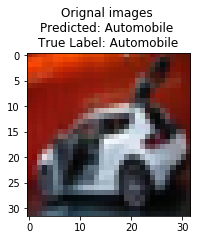

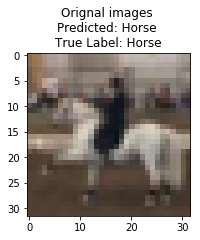

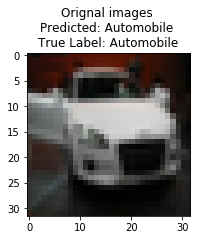

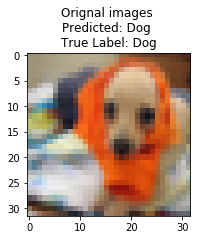

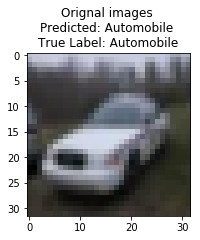

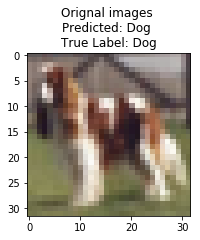

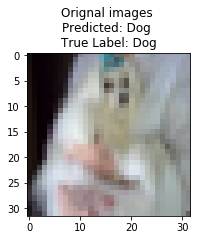

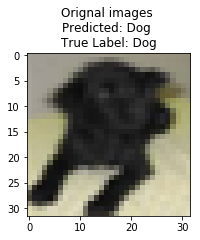

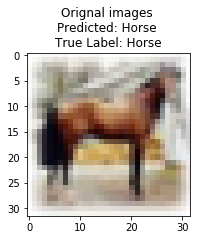

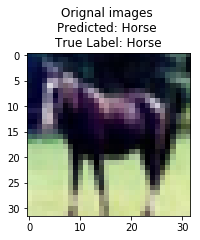

In [198]:
for i in range(10):
    show_test(100*i) #similar images are showing according to its true label #25=dog,1000=horse, 2000=automobile